In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Load example: Amazon stock closing prices
df = yf.download("AMZN", start="2023-01-01", end="2025-06-16")
data = df["Close"]


<ipython-input-2-4152090795>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AMZN", start="2023-01-01", end="2025-06-16")
[*********************100%***********************]  1 of 1 completed


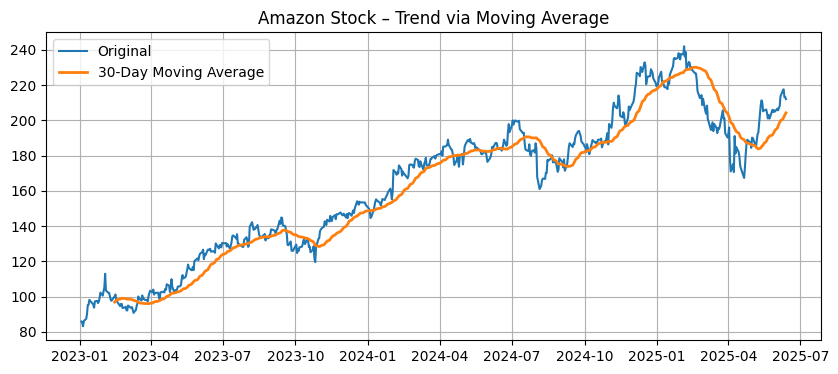

In [3]:
# 1. Moving average smoothing
window = 30
ma = data.rolling(window=window).mean()

# Plot original vs smoothed
plt.figure(figsize=(10, 4))
plt.plot(data, label="Original")
plt.plot(ma, label=f"{window}-Day Moving Average", linewidth=2)
plt.title("Amazon Stock – Trend via Moving Average")
plt.legend()
plt.grid(True)
plt.show()

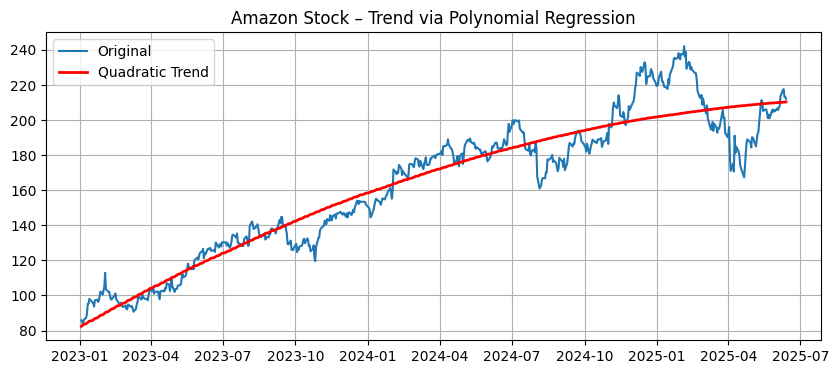

In [4]:
# 2. Polynomial regression (fit a 2nd-degree curve)
x = np.arange(len(data)).reshape(-1, 1)
y = data.values.reshape(-1, 1)

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression().fit(x_poly, y)
trend = model.predict(x_poly)

# Plot trend line
plt.figure(figsize=(10, 4))
plt.plot(data.index, y, label="Original")
plt.plot(data.index, trend, label="Quadratic Trend", color='red', linewidth=2)
plt.title("Amazon Stock – Trend via Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()


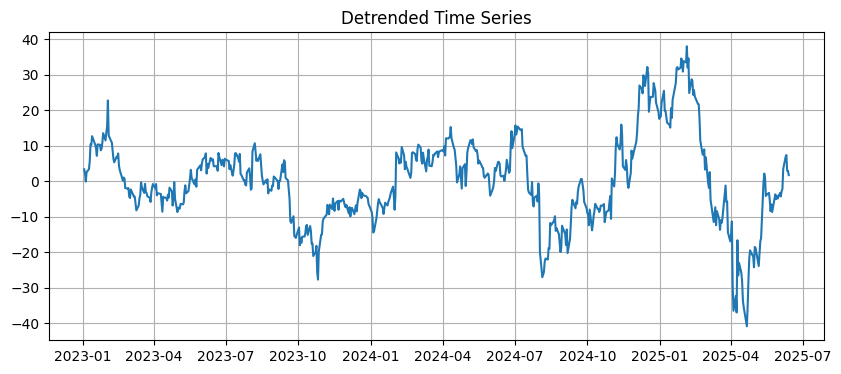

In [5]:
# 3. Detrending the series (remove fitted trend)
detrended = y.flatten() - trend.flatten()

plt.figure(figsize=(10, 4))
plt.plot(data.index, detrended)
plt.title("Detrended Time Series")
plt.grid(True)
plt.show()